In [1]:
import torch
#Will be false. Keep runtime as cpu for time being, as I use cpu for running the neural network since data is still small and its still fast.
torch.cuda.is_available()

True

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
import glob
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
'''
Labels
Row Index
Label
0 - 6094, 45769, 43960
1 - 43948, 64303, 25416
2 - 12461, 67001, 47375
3 - 59366, 47356, 7745
4 - 2874, 30708, 12306
5 - 28994, 59956, 14670
6 - 48033, 67512, 37990
7 - 45973, 16712, 69543
8 - 3493, 31182, 12928
9 - 40341, 35732, 25371
'''


'''
Df Original Columns
Timestamp,	EEG.Counter,	EEG.Interpolated,
EEG.AF3,	EEG.F7,	EEG.F3,	EEG.FC5,	EEG.T7,	EEG.P7,	EEG.O1,	EEG.O2,	EEG.P8,	EEG.T8,	EEG.FC6,	EEG.F4,	EEG.F8,	EEG.AF4,
EEG.RawCq,	EEG.Battery,	EEG.BatteryPercent,	MarkerIndex,	MarkerType,	MarkerValueInt,	EEG.MarkerHardware,
CQ.AF3,	CQ.F7,	CQ.F3,	CQ.FC5,	CQ.T7,	CQ.P7,	CQ.O1,	CQ.O2,	CQ.P8,	CQ.T8,	CQ.FC6,	CQ.F4,	CQ.F8,	CQ.AF4,
CQ.Overall,	EQ.SampleRateQuality,	EQ.OVERALL,
EQ.AF3,	EQ.F7,	EQ.F3,	EQ.FC5,	EQ.T7,	EQ.P7,	EQ.O1,	EQ.O2,	EQ.P8,	EQ.T8,	EQ.FC6,	EQ.F4,	EQ.F8,	EQ.AF4,
'''

'\nDf Original Columns\nTimestamp,\tEEG.Counter,\tEEG.Interpolated,\nEEG.AF3,\tEEG.F7,\tEEG.F3,\tEEG.FC5,\tEEG.T7,\tEEG.P7,\tEEG.O1,\tEEG.O2,\tEEG.P8,\tEEG.T8,\tEEG.FC6,\tEEG.F4,\tEEG.F8,\tEEG.AF4,\nEEG.RawCq,\tEEG.Battery,\tEEG.BatteryPercent,\tMarkerIndex,\tMarkerType,\tMarkerValueInt,\tEEG.MarkerHardware,\nCQ.AF3,\tCQ.F7,\tCQ.F3,\tCQ.FC5,\tCQ.T7,\tCQ.P7,\tCQ.O1,\tCQ.O2,\tCQ.P8,\tCQ.T8,\tCQ.FC6,\tCQ.F4,\tCQ.F8,\tCQ.AF4,\nCQ.Overall,\tEQ.SampleRateQuality,\tEQ.OVERALL,\nEQ.AF3,\tEQ.F7,\tEQ.F3,\tEQ.FC5,\tEQ.T7,\tEQ.P7,\tEQ.O1,\tEQ.O2,\tEQ.P8,\tEQ.T8,\tEQ.FC6,\tEQ.F4,\tEQ.F8,\tEQ.AF4,\n'

In [5]:
import os
import glob
import re

#I saved and moved the data into a local drive that I can access. This is the same data folder that was shared with me but on my drive instead for quick access
path = '/content/drive/My Drive/eeg_readings/'

# IDs per Label. Making the Dataframe back into a lablled frame.
ids = {0: [6094, 45769, 43960], 1: [43948, 64303, 25416], 2: [12461, 67001, 47375],
       3: [59366, 47356, 7745], 4: [2874, 30708, 12306], 5: [28994, 59956, 14670],
       6: [48033, 67512, 37990], 7: [45973, 16712, 69543], 8: [3493, 31182, 12928],
       9: [40341, 35732, 25371]}

# Flatten the dictionary for easier lookup
id_to_label = {id_num: label for label, id_list in ids.items() for id_num in id_list}

all_files = glob.glob(os.path.join(path, "*.csv"))

# Make dfs and concat all DFs together vertically
df_list = []
for filename in all_files:
    # Read the first row to get the image number / id
    first_row = pd.read_csv(filename, nrows=1, header=None)
    image_info = first_row.iloc[0, 0]

    # Extract the image number using regex
    match = re.search(r'image_(\d+)', image_info)

    image_number = int(match.group(1))

    # Read the rest of the CSV file, using the second row as headers
    df = pd.read_csv(filename, skiprows=1, header=0)

    # Remove any unnamed columns (often created by trailing commas) - Advice from chatgpt, remove if needed
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Add the label based on the image number
    label = id_to_label.get(image_number, -1)  # -1 as default if not found
    df['Label'] = label

    df_list.append(df)

combined_df = pd.concat(df_list, axis=0, ignore_index=True)

# Print info about the combined dataframe
print(f"Number of CSV files read: {len(df_list)}")
print(f"Shape of combined dataframe: {combined_df.shape}")
print(f"Columns in combined dataframe: {combined_df.columns.tolist()}")

print(combined_df.head())

print(combined_df['Label'].value_counts())

Number of CSV files read: 30
Shape of combined dataframe: (38891, 56)
Columns in combined dataframe: ['Timestamp', 'EEG.Counter', 'EEG.Interpolated', 'EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4', 'EEG.RawCq', 'EEG.Battery', 'EEG.BatteryPercent', 'MarkerIndex', 'MarkerType', 'MarkerValueInt', 'EEG.MarkerHardware', 'CQ.AF3', 'CQ.F7', 'CQ.F3', 'CQ.FC5', 'CQ.T7', 'CQ.P7', 'CQ.O1', 'CQ.O2', 'CQ.P8', 'CQ.T8', 'CQ.FC6', 'CQ.F4', 'CQ.F8', 'CQ.AF4', 'CQ.Overall', 'EQ.SampleRateQuality', 'EQ.OVERALL', 'EQ.AF3', 'EQ.F7', 'EQ.F3', 'EQ.FC5', 'EQ.T7', 'EQ.P7', 'EQ.O1', 'EQ.O2', 'EQ.P8', 'EQ.T8', 'EQ.FC6', 'EQ.F4', 'EQ.F8', 'EQ.AF4', 'Label']
      Timestamp  EEG.Counter  EEG.Interpolated      EEG.AF3       EEG.F7  \
0  1.722624e+09         68.0               0.0  4183.589844  4551.794922   
1  1.722624e+09         69.0               0.0  4189.230957  4555.384766   
2  1.722624e+09         70.0          

In [6]:
#Making the correct datatypes based off of the API documentation.

#Defining the EEG sensor columns
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

#Convert columns to appropriate data types
combined_df['EEG.Counter'] = combined_df['EEG.Counter'].astype(int)
combined_df['EEG.Interpolated'] = combined_df['EEG.Interpolated'].astype(int)
combined_df['EEG.RawCq'] = combined_df['EEG.RawCq'].astype(int)
combined_df['EEG.MarkerHardware'] = combined_df['EEG.MarkerHardware'].astype(int)
combined_df['Label'] = combined_df['Label'].astype(int)

#Convert EEG sensor columns to float
for sensor in eeg_sensors:
    combined_df[sensor] = combined_df[sensor].astype(float)

In [7]:
#Create spectrograms.
from scipy import signal

#sampling frequency (Hz)
fs = 128  # Adjust if needed please

# Define the number of samples to use for each spectrogram
samples_per_spectrogram = 1000  # *****Im not sure how many samples would be best here.*****

def create_time_series(group):
    return group.values

# Group the data by Label and create time series
grouped_data = combined_df.groupby('Label')
time_series_data = grouped_data[eeg_sensors].apply(create_time_series)

def create_spectrogram(data, fs):
    f, t, Sxx = signal.spectrogram(data, fs, nperseg=128, noverlap=64)
    return 10 * np.log10(Sxx)

def create_sample_spectrograms(data):
    spectrograms = []
    for channel in range(data.shape[1]):
        spec = create_spectrogram(data[:samples_per_spectrogram, channel], fs)
        spectrograms.append(spec)
    return np.stack(spectrograms)

# Create spectrograms for each group
spectrograms = time_series_data.apply(create_sample_spectrograms)

# Create a new DataFrame with the spectrograms and labels
spectrogram_df = pd.DataFrame({
    'spectrogram': spectrograms,
    'Label': spectrograms.index
})

print(spectrogram_df.head())
print("Shape of first spectrogram:", spectrogram_df['spectrogram'].iloc[0].shape)
print(combined_df.dtypes)

                                             spectrogram  Label
Label                                                          
0      [[[13.352050653491075, 6.589057342277749, -11....      0
1      [[[6.959833610569959, -12.360671355437843, -1....      1
2      [[[-7.9019683033914765, -5.491770033044883, 8....      2
3      [[[3.2770983873464807, 4.845469331885718, -12....      3
4      [[[2.7629515331508303, 2.232539733286501, -2.6...      4
Shape of first spectrogram: (14, 65, 14)
Timestamp               float64
EEG.Counter               int64
EEG.Interpolated          int64
EEG.AF3                 float64
EEG.F7                  float64
EEG.F3                  float64
EEG.FC5                 float64
EEG.T7                  float64
EEG.P7                  float64
EEG.O1                  float64
EEG.O2                  float64
EEG.P8                  float64
EEG.T8                  float64
EEG.FC6                 float64
EEG.F4                  float64
EEG.F8                  float64

Using device: cuda
Epoch [10/50], Loss: 0.9570
Epoch [20/50], Loss: 0.2809
Epoch [30/50], Loss: 0.2677
Epoch [40/50], Loss: 0.5501
Epoch [50/50], Loss: 0.1318
Classification Report:
Class 0:
  Precision: 0.7860
  Recall: 0.7891
  F1-score: 0.7875
Class 1:
  Precision: 0.7558
  Recall: 0.8434
  F1-score: 0.7972
Class 2:
  Precision: 0.8092
  Recall: 0.7726
  F1-score: 0.7905
Class 3:
  Precision: 0.8612
  Recall: 0.7349
  F1-score: 0.7930
Class 4:
  Precision: 0.9099
  Recall: 0.8780
  F1-score: 0.8937
Class 5:
  Precision: 0.8736
  Recall: 0.8303
  F1-score: 0.8514
Class 6:
  Precision: 0.8239
  Recall: 0.8312
  F1-score: 0.8275
Class 7:
  Precision: 0.8271
  Recall: 0.7652
  F1-score: 0.7949
Class 8:
  Precision: 0.7826
  Recall: 0.8259
  F1-score: 0.8037
Class 9:
  Precision: 0.8163
  Recall: 0.9452
  F1-score: 0.8760
Accuracy: 0.8226

Feature Importances:
EEG.T7: 3.4542
EEG.FC6: 2.0776
EEG.F3: 1.4899
EEG.F8: 1.3245
EEG.F4: 1.2571
EEG.FC5: 1.2569
EEG.O1: 1.2504
EEG.AF3: 1.1544
EEG.AF

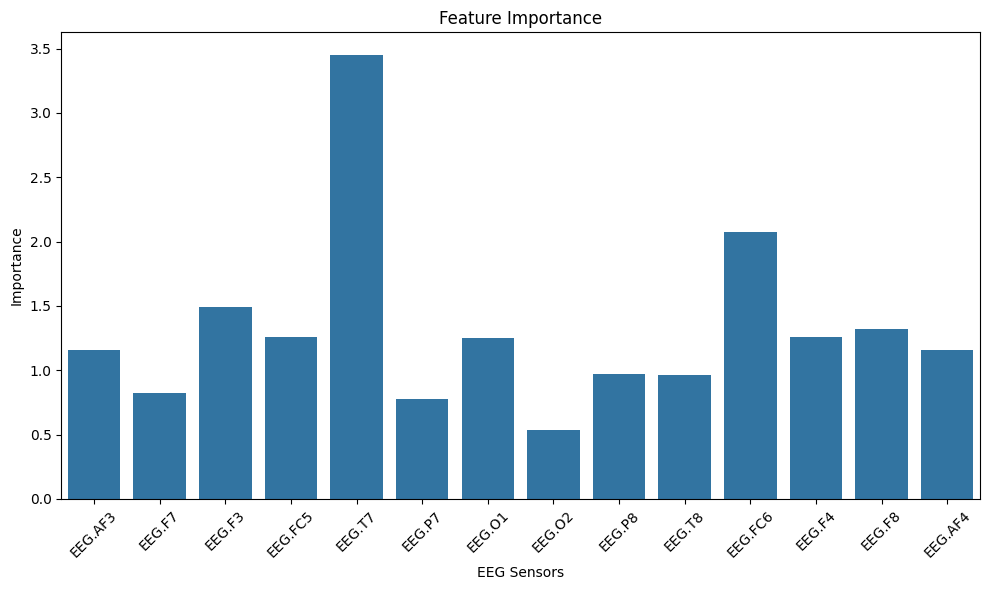

In [19]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Assuming combined_df is already created and contains your data

# Define the EEG sensor columns
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

# Prepare features (X) and target (y)
X = combined_df[eeg_sensors].values
y = combined_df['Label'].values

# Convert to PyTorch tensors
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

# Normalize the features
mean = X.mean(dim=0)
std = X.std(dim=0)
X = (X - mean) / std

# Define a custom Dataset
class EEGDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create the full dataset
full_dataset = EEGDataset(X, y)

# Split the data
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network
class EEGNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EEGNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = EEGNet(len(eeg_sensors), 10).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(batch_y.numpy())

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    classes = sorted(set(y_true))
    metrics = {}
    for cls in classes:
        tp = sum((yt == cls and yp == cls) for yt, yp in zip(y_true, y_pred))
        fp = sum((yt != cls and yp == cls) for yt, yp in zip(y_true, y_pred))
        fn = sum((yt == cls and yp != cls) for yt, yp in zip(y_true, y_pred))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics[cls] = {"precision": precision, "recall": recall, "f1-score": f1}

    accuracy = sum(yt == yp for yt, yp in zip(y_true, y_pred)) / len(y_true)
    metrics["accuracy"] = accuracy

    return metrics

metrics = calculate_metrics(y_true, y_pred)

print("Classification Report:")
for cls, cls_metrics in metrics.items():
    if cls == "accuracy":
        print(f"Accuracy: {cls_metrics:.4f}")
    else:
        print(f"Class {cls}:")
        print(f"  Precision: {cls_metrics['precision']:.4f}")
        print(f"  Recall: {cls_metrics['recall']:.4f}")
        print(f"  F1-score: {cls_metrics['f1-score']:.4f}")

# Feature importance (approximation using gradient-based method)
model.train()
feature_importance = torch.zeros(len(eeg_sensors))
for batch_X, batch_y in train_loader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    batch_X.requires_grad = True
    outputs = model(batch_X)
    loss = criterion(outputs, batch_y)
    loss.backward()
    feature_importance += torch.abs(batch_X.grad).sum(dim=0).cpu()

feature_importance /= len(train_loader)
importance_dict = dict(zip(eeg_sensors, feature_importance.numpy()))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(importance_dict.keys()), y=list(importance_dict.values()))
plt.title('Feature Importance')
plt.xlabel('EEG Sensors')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Calculate mean and standard deviation for each EEG sensor, grouped by label
stats_by_label = combined_df.groupby('Label')[eeg_sensors].agg(['mean', 'std'])
print(stats_by_label)

# Calculate overall correlation between EEG sensors and labels
correlations = combined_df[eeg_sensors + ['Label']].corr()['Label'].sort_values(ascending=False)
print("\nCorrelations with Label:")
print(correlations)

           EEG.AF3                  EEG.F7                  EEG.F3             \
              mean        std         mean        std         mean        std   
Label                                                                           
0      4172.830540  46.085280  4548.036515  41.340086  4388.431262  22.347567   
1      4166.140075  28.478737  4535.516130  34.242428  4383.142750  15.952503   
2      4160.175992  30.069523  4530.413013  29.400761  4379.776372  18.660109   
3      4163.778745  22.768838  4535.055908  30.216175  4383.393470  16.903425   
4      4162.678090  20.734247  4536.864629  29.336331  4381.733460  15.845582   
5      4194.366767  82.487866  4575.028604  75.871211  4428.514779  83.366202   
6      4162.453907  20.839099  4544.343005  24.860776  4386.047347  18.466256   
7      4166.618740  25.649585  4542.266331  26.347661  4385.870388  21.807915   
8      4161.175815  20.990463  4543.234226  20.203782  4384.628973  18.271862   
9      4159.433369  31.62181

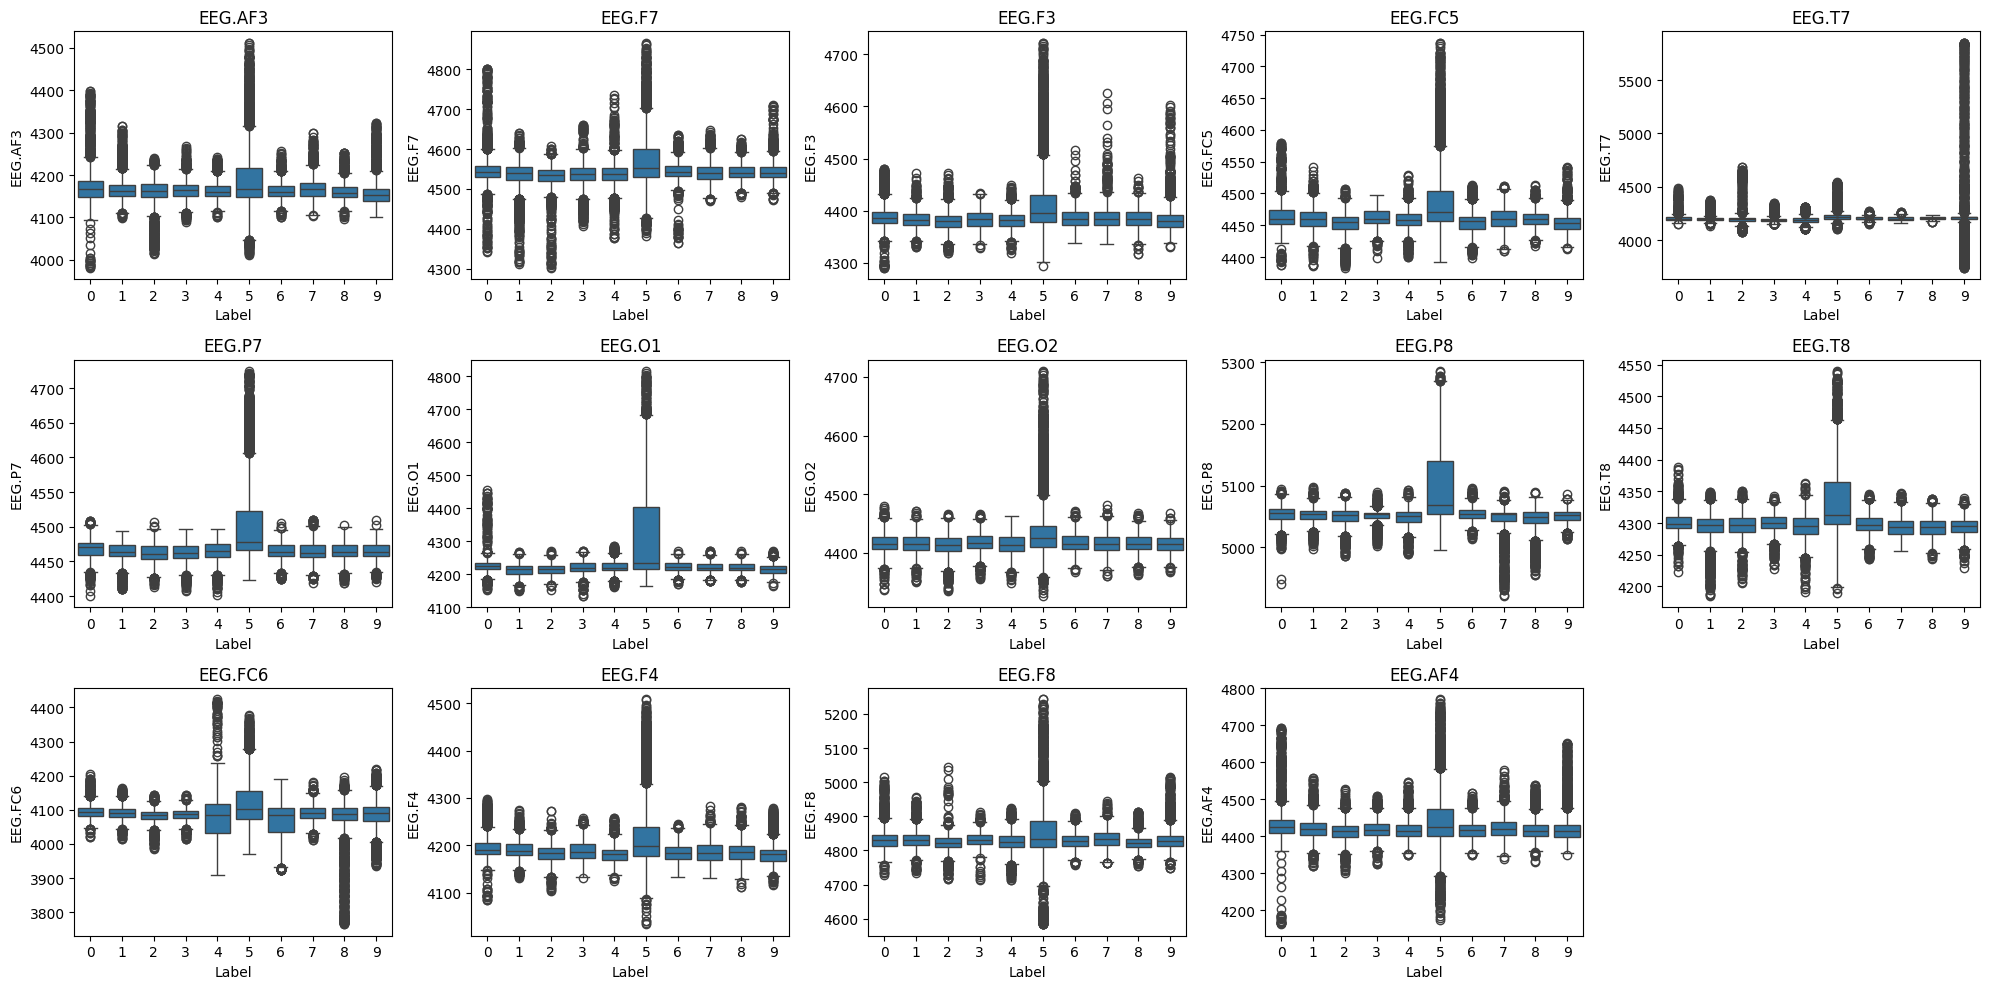

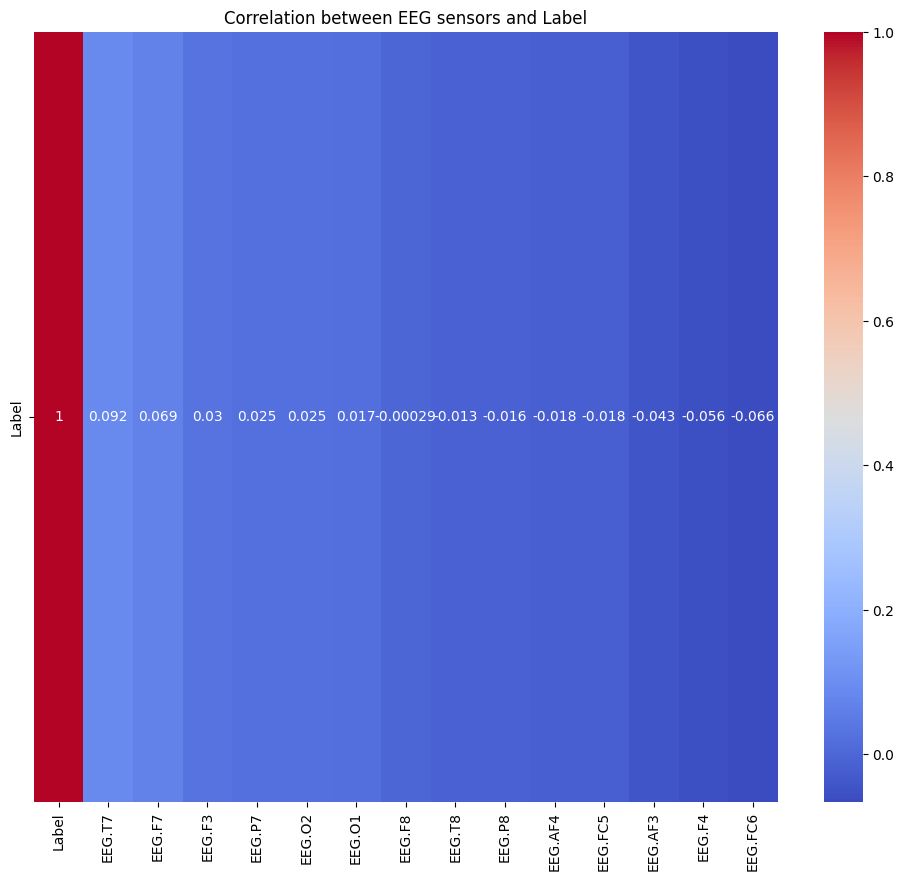

In [9]:
# Box plot for each EEG sensor, grouped by label
plt.figure(figsize=(20, 10))
for i, sensor in enumerate(eeg_sensors, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='Label', y=sensor, data=combined_df)
    plt.title(sensor)
plt.tight_layout()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlations.to_frame().transpose(), annot=True, cmap='coolwarm')
plt.title('Correlation between EEG sensors and Label')
plt.show()

In [10]:
import torch
from torch.fft import fft
from scipy import signal
# AI generate code to try and see what my charts look like so far.

# Function to create a spectrogram
def create_spectrogram(data, fs, nperseg=256):
    f, t, Sxx = signal.spectrogram(data, fs, nperseg=nperseg)
    return f, t, Sxx

# Set your sampling frequency (Hz)
fs = 128  # Adjust this based on your actual sampling rate

# Select a subset of data for visualization (e.g., first 1000 samples)
n_samples = 1000
data_subset = combined_df[eeg_sensors].iloc[:n_samples].values

# Create spectrograms for each EEG sensor
n_sensors = len(eeg_sensors)
fig, axs = plt.subplots(n_sensors, 1, figsize=(15, 4*n_sensors))
fig.suptitle('EEG Spectrograms')

for i, sensor in enumerate(eeg_sensors):
    f, t, Sxx = create_spectrogram(data_subset[:, i], fs)
    axs[i].pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    axs[i].set_ylabel('Frequency [Hz]')
    axs[i].set_title(f'Spectrogram: {sensor}')

axs[-1].set_xlabel('Time [sec]')
plt.tight_layout()
plt.show()

# Create a function to generate spectrograms for all data
def generate_spectrograms(data, fs, nperseg=256):
    n_samples, n_channels = data.shape
    f, t, Sxx = create_spectrogram(data[:, 0], fs, nperseg)
    spectrograms = np.zeros((Sxx.shape[0], Sxx.shape[1], n_channels))

    for i in range(n_channels):
        _, _, Sxx = create_spectrogram(data[:, i], fs, nperseg)
        spectrograms[:, :, i] = Sxx

    return f, t, spectrograms

# Generate spectrograms for all data
f, t, spectrograms = generate_spectrograms(combined_df[eeg_sensors].values, fs)

# Now, spectrograms is a 3D array: (frequency, time, channel)
print("Spectrogram shape:", spectrograms.shape)

In [11]:
#More ai generation for plots, made to compare how each sensor is reacting to each label in our dataset.

# Set your sampling frequency (Hz)
fs = 128  # Please confirm if this is correct for your data

# Define EEG sensors
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

# Get unique labels
labels = sorted(combined_df['Label'].unique())

# Function to create spectrogram
def create_spectrogram(data, fs):
    f, t, Sxx = signal.spectrogram(data, fs, nperseg=128, noverlap=64)
    return f, t, 10 * np.log10(Sxx)

# Plot spectrograms for each sensor
for sensor in eeg_sensors:
    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle(f'Spectrograms for {sensor}', fontsize=16)

    for i, label in enumerate(labels):
        # Get data for this label and sensor
        label_data = combined_df[combined_df['Label'] == label][sensor].values[:1000]

        # Normalize the data
        label_data = (label_data - np.mean(label_data)) / np.std(label_data)

        # Create spectrogram
        f, t, Sxx = create_spectrogram(label_data, fs)

        # Plot spectrogram
        ax = axes[i//5, i%5]
        im = ax.pcolormesh(t, f, Sxx, shading='gouraud', vmin=-80, vmax=0)
        ax.set_ylabel('Frequency [Hz]')
        ax.set_xlabel('Time [sec]')
        ax.set_title(f'Label {label}')
        ax.set_ylim(0, 50)

    # Remove any unused subplots
    for j in range(i+1, 10):
        fig.delaxes(axes[j//5, j%5])

    # Add a colorbar to the entire figure
    fig.colorbar(im, ax=axes.ravel().tolist(), label='Power/Frequency (dB/Hz)')

    plt.tight_layout()
    plt.show()

    # Print some statistics for this sensor
    print(f"\nStatistics for {sensor}:")
    for label in labels:
        label_data = combined_df[combined_df['Label'] == label][sensor].values[:1000]
        print(f"Label {label}:")
        print(f"  Mean: {np.mean(label_data):.2f}")
        print(f"  Std Dev: {np.std(label_data):.2f}")
        print(f"  Min: {np.min(label_data):.2f}")
        print(f"  Max: {np.max(label_data):.2f}")

Output hidden; open in https://colab.research.google.com to view.

In [12]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Ran into some issues last night, switched to cpu for the time being especially because data is still small.
device = torch.device("cpu")
print(f"Using device: {device}")

# 1. Data Preparation
le = LabelEncoder()
spectrogram_df['Label_encoded'] = le.fit_transform(spectrogram_df['Label'])

print("Label distribution:")
print(spectrogram_df['Label_encoded'].value_counts().sort_index())

num_classes = len(spectrogram_df['Label_encoded'].unique())

train_df, test_df = train_test_split(spectrogram_df, test_size=0.2, random_state=42)

print("Train set label distribution:")
print(train_df['Label_encoded'].value_counts().sort_index())
print("Test set label distribution:")
print(test_df['Label_encoded'].value_counts().sort_index())

# 2. Model Definition, is this correct? I tried using references however I felt lost in this aspect.
class EEGCNN(nn.Module):
    def __init__(self, input_shape, num_classes):
        super(EEGCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_shape[0], 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

        self._to_linear = None
        self._initialize_shape(torch.zeros(1, *input_shape))

        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _initialize_shape(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(nn.functional.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# 3. I followed one of the solutions datasets and changes as needed.
class EEGDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        spectrogram = self.data.iloc[idx]['spectrogram']
        spectrogram = torch.FloatTensor(spectrogram)
        spectrogram = (spectrogram - spectrogram.mean()) / (spectrogram.std() + 1e-8)
        label = torch.LongTensor([self.data.iloc[idx]['Label_encoded']])
        return spectrogram, label.squeeze()


train_dataset = EEGDataset(train_df)
test_dataset = EEGDataset(test_df)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


# Trying a class weight
class_counts = spectrogram_df['Label_encoded'].value_counts().sort_index()
total_samples = len(spectrogram_df)
class_weights = torch.FloatTensor([total_samples / (num_classes * count) for count in class_counts])
print("Class weights:", class_weights)

# 6. Model Initialization
input_shape = train_df['spectrogram'].iloc[0].shape
print(f"Input shape: {input_shape}")
model = EEGCNN(input_shape=input_shape, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device), ignore_index=-100)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# 7. Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (batch_spectrograms, batch_labels) in enumerate(train_loader):
        batch_spectrograms, batch_labels = batch_spectrograms.to(device), batch_labels.to(device)

        optimizer.zero_grad()
        outputs = model(batch_spectrograms)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_spectrograms, batch_labels in test_loader:
            batch_spectrograms, batch_labels = batch_spectrograms.to(device), batch_labels.to(device)
            outputs = model(batch_spectrograms)
            loss = criterion(outputs, batch_labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    print(f'Validation Loss: {val_loss/len(test_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

# 8. Final Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_spectrograms, batch_labels in test_loader:
        batch_spectrograms, batch_labels = batch_spectrograms.to(device), batch_labels.to(device)
        outputs = model(batch_spectrograms)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Using device: cpu
Label distribution:
Label_encoded
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: count, dtype: int64
Train set label distribution:
Label_encoded
0    1
2    1
3    1
4    1
5    1
6    1
7    1
9    1
Name: count, dtype: int64
Test set label distribution:
Label_encoded
1    1
8    1
Name: count, dtype: int64
Class weights: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Input shape: (14, 65, 14)
Epoch [1/50], Loss: 2.5722
Validation Loss: 2.3819, Accuracy: 0.00%
Epoch [2/50], Loss: 2.3566
Validation Loss: 2.3138, Accuracy: 0.00%
Epoch [3/50], Loss: 2.2975
Validation Loss: 2.3578, Accuracy: 0.00%
Epoch [4/50], Loss: 2.2746
Validation Loss: 2.4905, Accuracy: 0.00%
Epoch [5/50], Loss: 2.3183
Validation Loss: 2.8739, Accuracy: 0.00%
Epoch [6/50], Loss: 2.2264
Validation Loss: 2.9670, Accuracy: 0.00%
Epoch [7/50], Loss: 2.2125
Validation Loss: 2.8599, Accuracy: 0.00%
Epoch [8/50], Loss: 2.2174
Validation Loss: 3.1925, Accuracy: 0.00%
Epoch [9/

In [13]:
spectrogram_df.head()

,spectrogram,Label,Label_encoded
Label,,,
0,"[[[13.352050653491075, 6.589057342277749, -11....",0,0
1,"[[[6.959833610569959, -12.360671355437843, -1....",1,1
2,"[[[-7.9019683033914765, -5.491770033044883, 8....",2,2
3,"[[[3.2770983873464807, 4.845469331885718, -12....",3,3
4,"[[[2.7629515331508303, 2.232539733286501, -2.6...",4,4


In [14]:
spectrogram_df.columns

Index(['spectrogram', 'Label', 'Label_encoded'], dtype='object')

In [15]:
#Disregarding spectrogram df for now to focus on data quality.

cq_columns = ['CQ.AF3', 'CQ.F7', 'CQ.F3', 'CQ.FC5', 'CQ.T7', 'CQ.P7', 'CQ.O1',
              'CQ.O2', 'CQ.P8', 'CQ.T8', 'CQ.FC6', 'CQ.F4', 'CQ.F8', 'CQ.AF4']

# Calculate the percentage of good quality readings for each row
combined_df['CQ_percentage'] = combined_df[cq_columns].apply(lambda x: (x >= 0.83).mean(), axis=1)

# Filter the DataFrame to keep only rows with at least 83% good quality readings
high_quality_df = combined_df[combined_df['CQ_percentage'] >= 0.83]

print(f"Original DataFrame shape: {combined_df.shape}")
print(f"High quality DataFrame shape: {high_quality_df.shape}")

Original DataFrame shape: (38891, 57)
High quality DataFrame shape: (38291, 57)


In [16]:
import librosa

def extract_mfcc(signal, sr=128, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Assuming high_quality_df is your filtered DataFrame
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

mfcc_features = []

# Group the data by the label (assuming you have a 'Label' column)
grouped_data = high_quality_df.groupby('Label')

for label, group in grouped_data:
    # Combine all samples for this label
    label_data = group[eeg_sensors].values  # This creates a 2D numpy array

    # Transpose the data so that each row represents a sensor's time series
    label_data = label_data.T

    sample_mfccs = []
    for sensor_data in label_data:
        mfcc = extract_mfcc(sensor_data)
        sample_mfccs.append(mfcc)

    # Concatenate MFCCs from all sensors
    sample_mfcc_tensor = torch.tensor(np.concatenate(sample_mfccs, axis=0))
    mfcc_features.append(sample_mfcc_tensor)

# Create a tensor of all MFCC features
mfcc_tensor = torch.stack(mfcc_features)

print(f"MFCC tensor shape: {mfcc_tensor.shape}")

#MFCC TENSOR : (number_of_unique_labels, total_mfcc_features, time_steps)

MFCC tensor shape: torch.Size([10, 182, 8])


In [17]:
#Trying to filter signals here
def apply_filters(eeg_signals, fs=128):
    # Define filter parameters
    lowcut = 1  # Hz
    highcut = 50  # Hz
    nyquist = 0.5 * fs

    # Design Butterworth bandpass filter
    b, a = signal.butter(N=4, Wn=[lowcut/nyquist, highcut/nyquist], btype='band')

    # Apply filter
    filtered_signals = signal.filtfilt(b, a, eeg_signals)

    return filtered_signals

# Assuming high_quality_df is your filtered DataFrame
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

grouped_data = high_quality_df.groupby('Label')

filtered_data = []

for label, group in grouped_data:
    # Combine all samples for this label
    label_data = group[eeg_sensors].values  # This creates a 2D numpy array

    # Transpose the data so that each row represents a sensor's time series
    label_data = label_data.T

    # Apply filtering to all sensors at once
    filtered_label_data = apply_filters(label_data)

    # Create a DataFrame with the filtered data
    filtered_df = pd.DataFrame(filtered_label_data.T, columns=[f"{sensor}_filtered" for sensor in eeg_sensors])
    filtered_df['Label'] = label

    filtered_data.append(filtered_df)

# Combine all filtered data
filtered_df = pd.concat(filtered_data, ignore_index=True)

print("Filtering completed.")
print(f"New columns: {[col for col in filtered_df.columns if col.endswith('_filtered')]}")
print(f"Shape of filtered DataFrame: {filtered_df.shape}")

Filtering completed.
New columns: ['EEG.AF3_filtered', 'EEG.F7_filtered', 'EEG.F3_filtered', 'EEG.FC5_filtered', 'EEG.T7_filtered', 'EEG.P7_filtered', 'EEG.O1_filtered', 'EEG.O2_filtered', 'EEG.P8_filtered', 'EEG.T8_filtered', 'EEG.FC6_filtered', 'EEG.F4_filtered', 'EEG.F8_filtered', 'EEG.AF4_filtered']
Shape of filtered DataFrame: (38291, 15)


In [18]:
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import librosa
from sklearn.model_selection import train_test_split
import librosa
from joblib import Parallel, delayed

# Define custom Datasets
class MFCCDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

class FilteredDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.FloatTensor(data.values)
        self.labels = torch.LongTensor(labels.values)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# ResNet model for MFCC data
class ResNetEEG(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ResNetEEG, self).__init__()
        self.resnet = models.resnet18(weights=None)
        self.preprocess = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.resnet.conv1 = nn.Identity()
        self.resnet.bn1 = nn.Identity()
        self.resnet.relu = nn.Identity()
        self.resnet.maxpool = nn.Identity()
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.preprocess(x)
        x = self.resnet(x)
        return x

# LSTM model for filtered data
class LSTMEEG(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMEEG, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Optimized function to extract MFCC features
def extract_mfcc(signal, sr=128, n_mfcc=13):
    return librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)

# Function to process a single row
def process_row(row, eeg_sensors):
    return np.concatenate([extract_mfcc(np.array(row[sensor])) for sensor in eeg_sensors])

# Prepare data
eeg_sensors = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
               'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']

# Extract MFCC features from high_quality_df using parallel processing
n_jobs = -1  # Use all available cores
mfcc_features = Parallel(n_jobs=n_jobs)(
    delayed(process_row)(row, eeg_sensors) for _, row in high_quality_df.iterrows()
)

mfcc_tensor = torch.tensor(np.array(mfcc_features))
mfcc_labels = torch.LongTensor(high_quality_df['Label'].values)

# Prepare filtered data
filtered_features = filtered_df[[col for col in filtered_df.columns if col.endswith('_filtered')]]
filtered_labels = filtered_df['Label']

# Split data
mfcc_train_data, mfcc_test_data, mfcc_train_labels, mfcc_test_labels = train_test_split(
    mfcc_tensor, mfcc_labels, test_size=0.2, random_state=42)

filtered_train_data, filtered_test_data, filtered_train_labels, filtered_test_labels = train_test_split(
    filtered_features, filtered_labels, test_size=0.2, random_state=42)

# Create datasets
mfcc_train_dataset = MFCCDataset(mfcc_train_data, mfcc_train_labels)
mfcc_test_dataset = MFCCDataset(mfcc_test_data, mfcc_test_labels)
filtered_train_dataset = FilteredDataset(filtered_train_data, filtered_train_labels)
filtered_test_dataset = FilteredDataset(filtered_test_data, filtered_test_labels)

# Create data loaders
mfcc_train_loader = DataLoader(mfcc_train_dataset, batch_size=32, shuffle=True)
mfcc_test_loader = DataLoader(mfcc_test_dataset, batch_size=32, shuffle=False)
filtered_train_loader = DataLoader(filtered_train_dataset, batch_size=32, shuffle=True)
filtered_test_loader = DataLoader(filtered_test_dataset, batch_size=32, shuffle=False)

# Initialize models
mfcc_input_channels = mfcc_tensor.shape[1]
filtered_input_size = len([col for col in filtered_df.columns if col.endswith('_filtered')])
num_classes = len(torch.unique(mfcc_labels))

print(f"MFCC input shape: {mfcc_tensor.shape}")
print(f"Filtered input shape: {filtered_features.shape}")
print(f"Number of classes: {num_classes}")

resnet_model = ResNetEEG(input_channels=mfcc_input_channels, num_classes=num_classes)
lstm_model = LSTMEEG(input_size=filtered_input_size, hidden_size=128, num_layers=2, num_classes=num_classes)

# ... (keep the training and evaluation functions as they were)

# Train and evaluate ResNet model on MFCC data
resnet_criterion = nn.CrossEntropyLoss()
resnet_optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)

print("Training ResNet model on MFCC data:")
train_model(resnet_model, mfcc_train_loader, resnet_criterion, resnet_optimizer, num_epochs=10)
resnet_accuracy = evaluate_model(resnet_model, mfcc_test_loader)
print(f'ResNet accuracy on MFCC test data: {resnet_accuracy:.2f}%')

# Train and evaluate LSTM model on filtered data
lstm_criterion = nn.CrossEntropyLoss()
lstm_optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

print("\nTraining LSTM model on filtered data:")
train_model(lstm_model, filtered_train_loader, lstm_criterion, lstm_optimizer, num_epochs=10)
lstm_accuracy = evaluate_model(lstm_model, filtered_test_loader)
print(f'LSTM accuracy on filtered test data: {lstm_accuracy:.2f}%')

# Print shapes for debugging
print(f"MFCC tensor shape: {mfcc_tensor.shape}")
print(f"MFCC labels shape: {mfcc_labels.shape}")
print(f"Filtered features shape: {filtered_features.shape}")
print(f"Filtered labels shape: {filtered_labels.shape}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


ParameterError: Audio data must be at least one-dimensional, given y.shape=()